In [6]:
#numpy: Bilimsel hesaplama ve veri manipülasyonu için çok boyutlu dizilerin oluşturulması ve işlenmesini sağlayan kütüphane.
#geopandas: Coğrafi Bilgi Sistemleri verilerinin işlenmesi için kullanılan bir kütüphane.
#pandas: Veri analizi ve işleme için kullanılan bir kütüphane; verileri tablo şeklinde okuyabilir, filtreleyebilir, birleştirebilir, dönüştürebilir, gruplandırabilir ve özetleyebilirsiniz.
#shapely.geometry: Geometrik şekiller ve özellikleri üzerinde işlemler yapmak için kullanılan bir modül.
#matplotlib.pyplot: Veri görselleştirme için kullanılan bir kütüphane; grafiklerin oluşturulması ve özelleştirilmesi için birçok seçenek sunar.
import numpy as np
import geopandas as gpd
import pandas as pd
import shapely.geometry as shp
import matplotlib.pyplot as plt

In [7]:
#listings.csv dosyasındaki verileri evler adlı bir DataFrame'e okuyan işlem.
evler=pd.read_csv("listings.csv")

In [8]:
#evler değişkenin veri tipi, pandas kütüphanesindeki DataFrame veri tipidir.
type(evler)

pandas.core.frame.DataFrame

In [9]:
#evler veri yapısındaki sütunların etiketlerini (başlıklarını) içeren bir Index nesnesi döndürür. Bu sütun etiketleri, evler DataFrame'indeki sütunları tekil bir şekilde tanımlamak için kullanılır.
evler.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [10]:
#evler DataFrame'indeki longitude sütununu seçer ve bu sütundaki tüm verileri içeren bir pandas Serisi oluşturur. Bu Seri, evler veri yapısındaki her bir evin boylam değerini içerir.
evler.longitude

0        28.980300
1        28.966040
2        28.983240
3        28.979800
4        28.981530
           ...    
36712    28.947704
36713    28.848080
36714    28.977271
36715    28.971393
36716    28.986373
Name: longitude, Length: 36717, dtype: float64

In [11]:
#Yeni bir 'geometry' sütunu oluşturulur ve bu sütuna, evler veri yapısındaki 'longitude' ve 'latitude' sütunlarındaki veriler kullanılarak, her evin koordinatlarından oluşan shapely.geometry.Point nesneleri yerleştirilir. Bu işlem, her satırın (axis=1) 'longitude' ve 'latitude' sütunlarındaki değerleri birleştirerek Point nesnesi oluşturur ve bunu 'geometry' sütununa yerleştirir.
evler['geometry'] = evler[['longitude', 'latitude']].apply(shp.Point, axis=1)

In [12]:
#evler, listings.csv dosyasındaki verileri içeren ve 'geometry' sütunu eklenmiş DataFrame veri yapısını gösterir. Bu veri yapısı, her bir satırda bir evin farklı özelliklerini (fiyat, yatak sayısı, konum vb.) ve 'geometry' sütununda o evin koordinatlarını içerir.
evler

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,geometry
0,247874,"Istiklal Avenue,Sadri alisik street",1298849,Berkan,NaN,Beyoglu,41.033330,28.980300,Entire home/apt,588,2,197,2022-11-29,1.50,1,39,26,NaN,POINT (28.9803 41.03333)
1,618156,"Sultanahmet-Istanbul, Adalar Suite",2999837,Saban,NaN,Fatih,41.004170,28.966040,Entire home/apt,879,1,89,2022-11-06,0.72,13,354,17,NaN,POINT (28.96604 41.00417)
2,253055,CIHANGIR | Stunning Bosphorus View!,852380,Ilker,NaN,Beyoglu,41.033750,28.983240,Entire home/apt,3139,3,86,2022-11-20,0.64,5,319,15,NaN,POINT (28.98324 41.03375)
3,620129,Unique Concept in the Old City (Studio 1),3072862,Levent,NaN,Fatih,41.004560,28.979800,Private room,4315,1,17,2022-04-30,0.14,5,306,2,NaN,POINT (28.9798 41.00456)
4,27271,Lovely apartment in perfect location,117026,Mutlu,NaN,Beyoglu,41.032540,28.981530,Entire home/apt,999,10,4,2022-11-01,0.04,1,272,2,NaN,POINT (28.98153 41.03254)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36712,792457367750268976,Pleasant Flat in the Heart of Balat,227780486,Engin,NaN,Fatih,41.031461,28.947704,Entire home/apt,589,1,0,NaN,NaN,48,363,0,NaN,POINT (28.94770363226174 41.03146060216123)
36713,792458241608284854,gecelik günlük aylık daire,488504277,Mesut,NaN,Bahcelievler,40.995210,28.848080,Private room,800,1,0,NaN,NaN,1,365,0,NaN,POINT (28.84808 40.99521)
36714,792462372352157985,Bright & Cozy & Central,493287294,Selen,NaN,Beyoglu,41.036333,28.977271,Entire home/apt,1500,1,0,NaN,NaN,1,354,0,NaN,POINT (28.977271492590315 41.03633269038893)
36715,792462506567602985,Wonder Karaköy- 2 units 8 BR/AC,19798022,Wonder,NaN,Beyoglu,41.025024,28.971393,Entire home/apt,9989,1,0,NaN,NaN,94,365,0,NaN,POINT (28.971392846258745 41.02502422279678)


In [13]:
#evler DataFrame'i, geopandas kütüphanesi tarafından sağlanan GeoDataFrame veri yapısına dönüştürülür. Bu dönüşüm, 'geometry' sütunundaki verilerin geometrik veriler olduğunu (koordinatlar gibi) ve bu verilerin coğrafi işlemler yapmak için kullanılabileceğini belirtir.
evler = gpd.GeoDataFrame(evler)

In [14]:
#evler değişkenin veri tipi, geopandas kütüphanesindeki GeoDataFrame veri tipidir.
type(evler)

geopandas.geodataframe.GeoDataFrame

In [15]:
#evler GeoDataFrame'inin koordinat referans sistemi (CRS), verilerin doğru bir şekilde haritalanması için kullanılan koordinat sistemidir. evler.crs ifadesi, evler GeoDataFrame'inin mevcut koordinat referans sistemini döndürür.
evler.crs

In [16]:
#evler GeoDataFrame'inin koordinat referans sistemi (CRS) 'epsg:4329' olarak ayarlanır. Bu, verilerin coğrafi olarak doğru bir şekilde gösterilebilmesi için kullanılan bir koordinat sistemi belirtir.
evler.crs = {'init':'epsg:4329'}

C:\Users\syorg\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [17]:
#evler GeoDataFrame'inin mevcut koordinat referans sistemi (CRS) artık 'epsg:4329' olarak ayarlanmış durumdadır.
evler.crs

<Geographic 3D CRS: +init=epsg:4329 +type=crs>
Name: WGS 84 (3D)
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
- h[up]: Ellipsoidal height (metre)
Area of Use:
- name: World: Afghanistan, Albania, Algeria, American Samoa, Andorra, Angola, Anguilla, Antarctica, Antigua and Barbuda, Argentina, Armenia, Aruba, Australia, Austria, Azerbaijan, Bahamas, Bahrain, Bangladesh, Barbados, Belgium, Belgium, Belize, Benin, Bermuda, Bhutan, Bolivia, Bonaire, Saint Eustasius and Saba, Bosnia and Herzegovina, Botswana, Bouvet Island, Brazil, British Indian Ocean Territory, British Virgin Islands, Brunei Darussalam, Bulgaria, Burkina Faso, Burundi, Cambodia, Cameroon, Canada, Cape Verde, Cayman Islands, Central African Republic, Chad, Chile, China, Christmas Island, Cocos (Keeling) Islands, Comoros, Congo, Cook Islands, Costa Rica, Côte d'Ivoire (Ivory Coast), Croatia, Cuba, Curacao, Cyprus, Czechia, Denmark, Djibouti, Dominica, Dominican Republic, East Timor,

In [18]:
#evler.head() ifadesi, evler GeoDataFrame'inin ilk 5 satırını (varsayılan olarak) gösterir. Bu satırlar, veri yapısının yapısı ve içeriği hakkında bir fikir verir.
evler.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,geometry
0,247874,"Istiklal Avenue,Sadri alisik street",1298849,Berkan,NaN,Beyoglu,41.03333,28.98030,Entire home/apt,588,2,197,2022-11-29,1.50,1,39,26,NaN,POINT (28.98030 41.03333)
1,618156,"Sultanahmet-Istanbul, Adalar Suite",2999837,Saban,NaN,Fatih,41.00417,28.96604,Entire home/apt,879,1,89,2022-11-06,0.72,13,354,17,NaN,POINT (28.96604 41.00417)
2,253055,CIHANGIR | Stunning Bosphorus View!,852380,Ilker,NaN,Beyoglu,41.03375,28.98324,Entire home/apt,3139,3,86,2022-11-20,0.64,5,319,15,NaN,POINT (28.98324 41.03375)
3,620129,Unique Concept in the Old City (Studio 1),3072862,Levent,NaN,Fatih,41.00456,28.97980,Private room,4315,1,17,2022-04-30,0.14,5,306,2,NaN,POINT (28.97980 41.00456)
4,27271,Lovely apartment in perfect location,117026,Mutlu,NaN,Beyoglu,41.03254,28.98153,Entire home/apt,999,10,4,2022-11-01,0.04,1,272,2,NaN,POINT (28.98153 41.03254)


<AxesSubplot:>

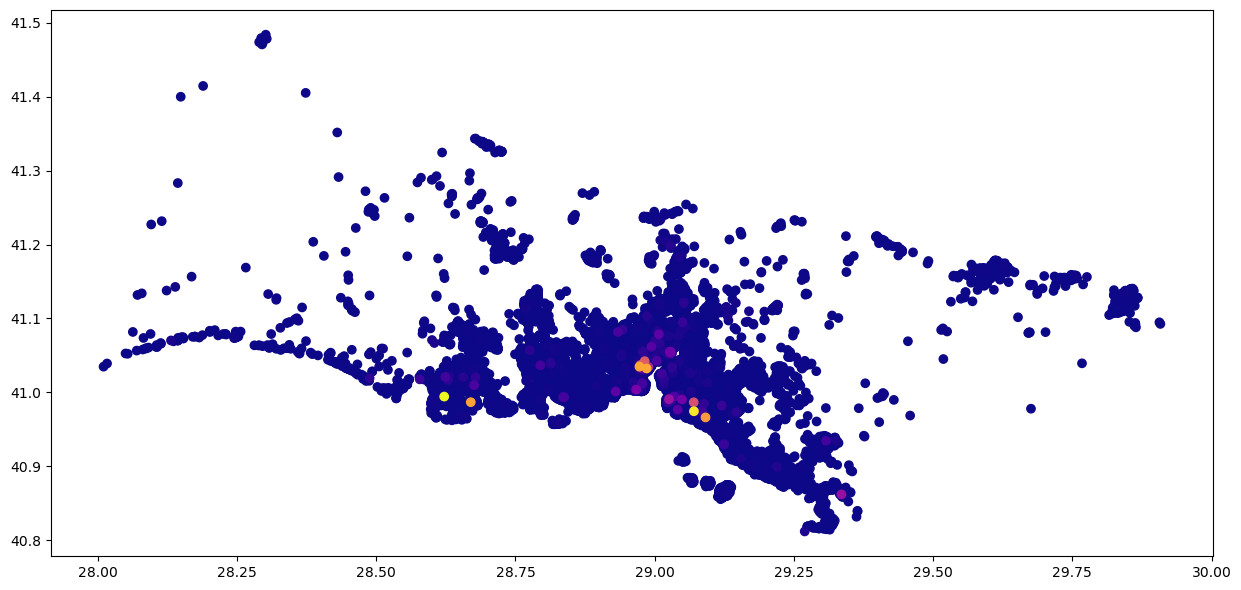

In [19]:
#evler GeoDataFrame'inin price sütununa göre sıralanmış hali, plot() metodu kullanılarak bir haritada gösterilir. Renk paleti olarak 'plasma' seçilir ve harita boyutları figsize parametresi ile (15, 15) olarak belirlenir. Bu işlem sonucu, fiyatları düşük evlerin maviye yakın renklerde, fiyatları yüksek evlerin kırmızıya yakın renklerde gösterildiği bir renk skalasına sahip bir harita oluşur.
evler.sort_values('price').plot('price',cmap = 'plasma',figsize=(15,15))

In [20]:
#ist_ilce, 'neighbourhoods.geojson' dosyasındaki coğrafi verileri içeren bir GeoDataFrame veri yapısıdır. Bu dosya, İstanbul ilindeki ilçelerin coğrafi verilerini içerir.
ist_ilce = gpd.read_file('neighbourhoods.geojson')

In [21]:
#ist_ilce.head(39) ifadesi, ist_ilce GeoDataFrame'inin ilk 39 satırını (varsayılan olarak) gösterir. Bu satırlar, veri yapısının yapısı ve içeriği hakkında bir fikir verir.
ist_ilce.head(39)

,neighbourhood,neighbourhood_group,geometry
0,Sile,NaN,"MULTIPOLYGON (((29.40004 41.08274, 29.40101 41..."
1,Catalca,NaN,"MULTIPOLYGON (((28.53614 41.10624, 28.53185 41..."
2,Eyup,NaN,"MULTIPOLYGON (((28.94881 41.26322, 28.94760 41..."
3,Sariyer,NaN,"MULTIPOLYGON (((29.05429 41.08144, 29.05436 41..."
4,Arnavutkoy,NaN,"MULTIPOLYGON (((28.81849 41.13628, 28.80986 41..."
5,Silivri,NaN,"MULTIPOLYGON (((28.38724 41.04804, 28.38520 41..."
6,Kagithane,NaN,"MULTIPOLYGON (((29.00345 41.09491, 29.00361 41..."
7,Buyukcekmece,NaN,"MULTIPOLYGON (((28.55267 41.10449, 28.55318 41..."
8,Esenyurt,NaN,"MULTIPOLYGON (((28.63047 41.01797, 28.62855 41..."
9,Beylikduzu,NaN,"MULTIPOLYGON (((28.68545 41.00178, 28.68214 41..."


In [22]:
#evler2, evler GeoDataFrame'indeki name sütununda boş değer içermeyen satırları içeren yeni bir GeoDataFrame veri yapısıdır. dropna() metodu, name sütunundaki herhangi bir eksik değeri içeren satırları kaldırır. Bu işlem sonucu, evler2 veri yapısında evler veri yapısına göre daha az satır olabilir.
evler2= evler.dropna(subset=['name'])

In [23]:
#evler2 GeoDataFrame'indeki name sütununda 'metrobüs' kelimesini içeren tüm satırları gösterir. str.contains() metodu, name sütununun her satırında 'metrobüs' kelimesi olup olmadığını kontrol eder ve sonuç olarak True veya False değeri döndürür. loc[] indeksleme yöntemi, sadece True olan satırları seçer ve bu satırları içeren yeni bir GeoDataFrame veri yapısı oluşturur.
evler2.loc[evler2['name'].str.contains('metrobüs')]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,geometry
532,2370174,"house close to metro, metrobüs,public transpor...",12105757,Mevsim,NaN,Kucukcekmece,41.036320,28.762880,Private room,479,2,0,NaN,NaN,1,0,0,NaN,POINT (28.76288 41.03632)
1921,10932179,Cozy home with balcony close to metrobüs and m...,56677778,Denizhan,NaN,Uskudar,41.005740,29.054360,Entire home/apt,1300,2,2,2021-10-01,0.10,1,365,0,NaN,POINT (29.05436 41.00574)
2289,15352408,Ferah aydınlık he huzurlu metro ve metrobüse 5...,72694624,Ramazan,NaN,Bahcelievler,40.992550,28.846680,Private room,650,3,12,2022-11-09,0.24,1,351,3,NaN,POINT (28.84668 40.99255)
2706,20784335,haramidere metrobüs /opposite haramidere metrobus,84972136,Bahadir,NaN,Beylikduzu,41.003130,28.671190,Private room,300,1,2,2018-09-23,0.03,1,365,0,NaN,POINT (28.67119 41.00313)
2999,23605973,Deniz manzaralı metrobüse yürüme mesafesinde,176551435,Selma,NaN,Avcilar,40.973390,28.739710,Entire home/apt,869,30,17,2022-04-17,0.30,7,169,2,NaN,POINT (28.73971 40.97339)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34593,777533654371503437,Kadıköyde metro metrobüse 5 dk mesafe bir rezi...,442944971,Nur,NaN,Kadikoy,40.994008,29.059930,Entire home/apt,739,1,5,2022-12-23,5.00,1,333,5,NaN,POINT (29.05993 40.99401)
34647,777203333485380823,located near metrobüs,419905982,Matin,NaN,Buyukcekmece,41.018550,28.628500,Entire home/apt,800,30,0,NaN,NaN,1,365,0,NaN,POINT (28.62850 41.01855)
35208,780979696183631074,Avcilar pelikan avm yanında metrobüse 4 dk yürüme,327062254,Uğur,NaN,Avcilar,40.993160,28.712870,Private room,300,1,0,NaN,NaN,1,365,0,NaN,POINT (28.71287 40.99316)
36124,789781975436762763,Kadıköy- Fikirtepe Residance / metrobüs,254945141,Caner,NaN,Kadikoy,40.990491,29.054055,Entire home/apt,2800,1,0,NaN,NaN,3,361,0,NaN,POINT (29.05405 40.99049)


<AxesSubplot:>

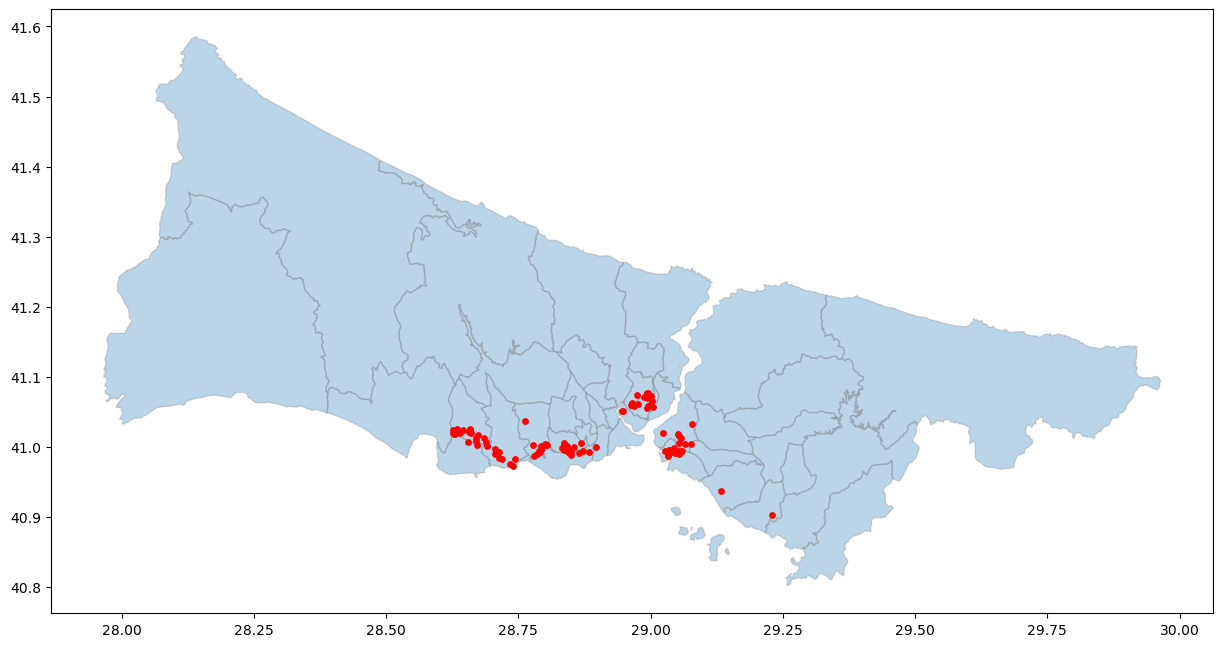

In [24]:
#Bu kod bloğu, İstanbul ilçelerinin sınırlarını içeren ist_ilce GeoDataFrame'i üzerinde, şeffaf ve gri sınır çizgileri olan bir harita çizerek başlar. Harita boyutları figsize parametresiyle belirlenir. Daha sonra, evler2 GeoDataFrame'indeki name sütununda 'metrobüs' kelimesini içeren satırların, ax adlı bu haritaya kırmızı renkte daire şeklinde (marker='o') ve 15 büyüklüğünde (markersize= 15) noktalar olarak eklenmesiyle devam eder.Böylece, İstanbul ilçeleri haritası üzerinde, 'metrobüs' kelimesi içeren konutların bulunduğu noktaların işaretlendiği kırmızı renkli bir nokta haritası oluşur.
ax = ist_ilce.plot(figsize=(15,15), alpha = 0.3, edgecolor ='gray')
evler2.loc[evler2['name'].str.contains('metrobüs')].plot(ax=ax, color='red', marker='o', markersize= 15)

<AxesSubplot:>

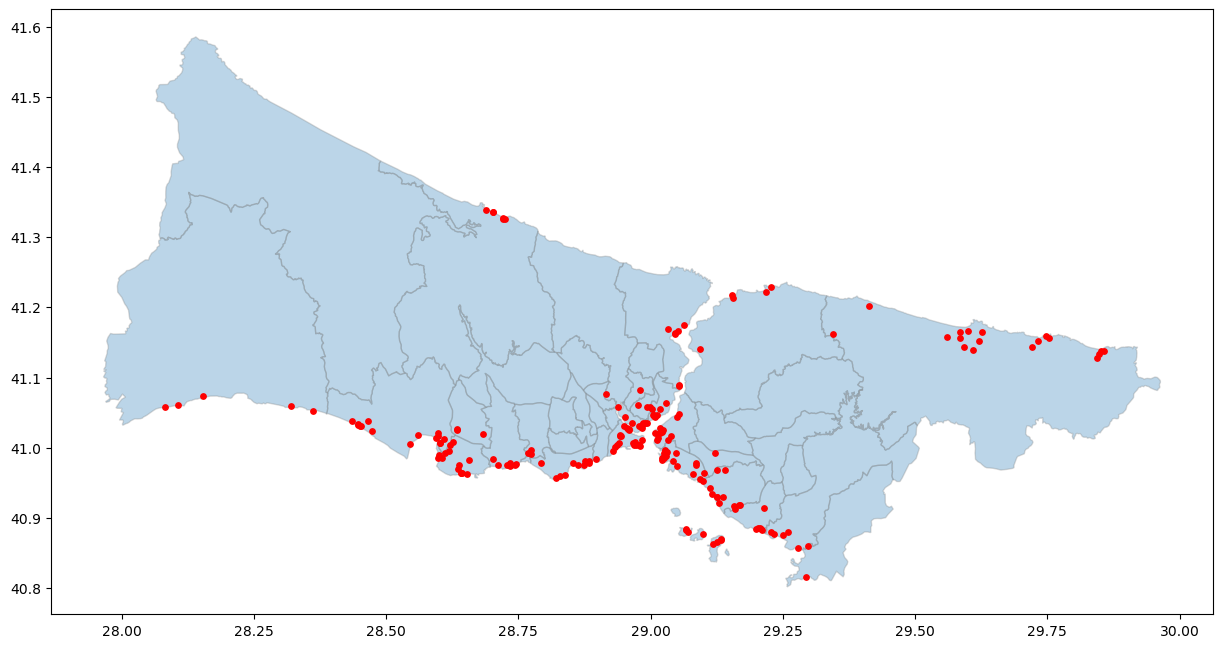

In [25]:
#İstanbul ilçelerinin sınırlarını içeren ist_ilce GeoDataFrame'i üzerinde, şeffaf ve gri sınır çizgileri olan bir harita çizerek başlar. Harita boyutları figsize parametresiyle belirlenir. Daha sonra, evler2 GeoDataFrame'indeki name sütununda 'deniz' kelimesini içeren satırların, ax adlı bu haritaya kırmızı renkte daire şeklinde (marker='o') ve 15 büyüklüğünde (markersize= 15) noktalar olarak eklenmesiyle devam eder.Böylece, İstanbul ilçeleri haritası üzerinde, 'deniz' kelimesi içeren konutların bulunduğu noktaların işaretlendiği kırmızı renkli bir nokta haritası oluşur.
ax = ist_ilce.plot(figsize=(15,15), alpha = 0.3, edgecolor ='gray')
evler2.loc[evler2['name'].str.contains('deniz')].plot(ax=ax, color='red', marker='o', markersize= 15)

<AxesSubplot:>

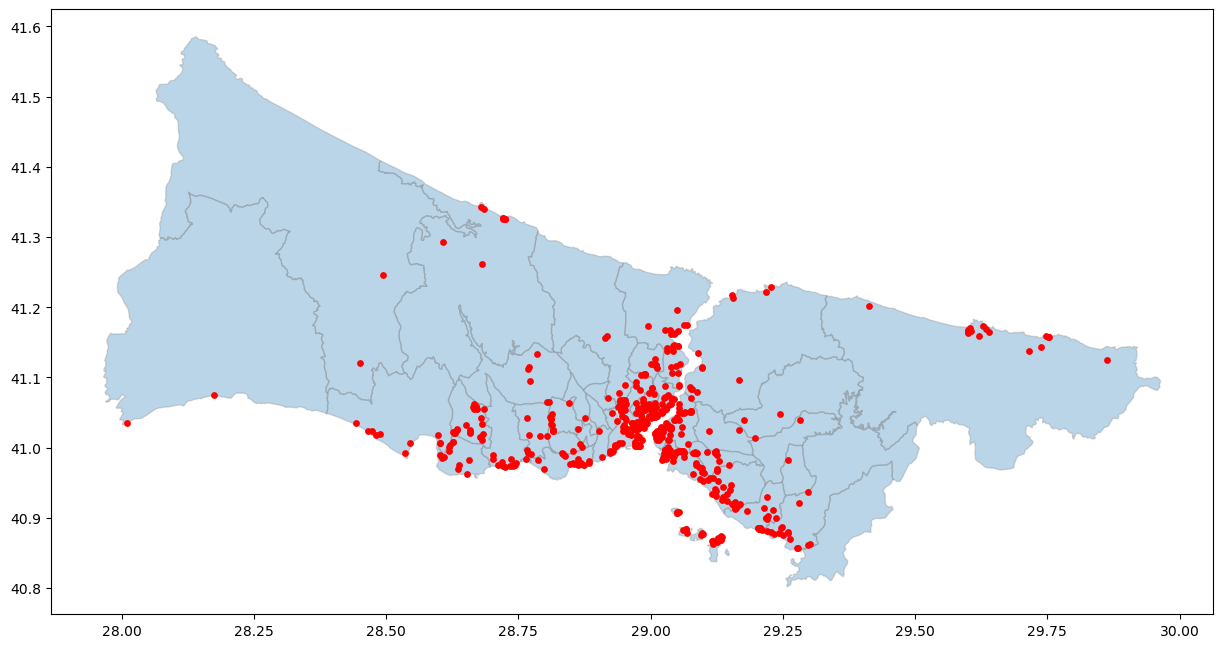

In [26]:
#Bu kod bloğu, İstanbul ilçelerinin sınırlarını içeren ist_ilce GeoDataFrame'i üzerinde, şeffaf ve gri sınır çizgileri olan bir harita çizerek başlar. Harita boyutları figsize parametresiyle belirlenir. Daha sonra, evler2 GeoDataFrame'indeki name sütununda 'manzara' kelimesini içeren satırların, ax adlı bu haritaya kırmızı renkte daire şeklinde (marker='o') ve 15 büyüklüğünde (markersize= 15) noktalar olarak eklenmesiyle devam eder.Böylece, İstanbul ilçeleri haritası üzerinde, 'manzara' kelimesi içeren konutların bulunduğu noktaların işaretlendiği kırmızı renkli bir nokta haritası oluşur.
ax = ist_ilce.plot(figsize=(15,15), alpha = 0.3, edgecolor ='gray')
evler2.loc[evler2['name'].str.contains('manzara')].plot(ax=ax, color='red', marker='o', markersize= 15)

<AxesSubplot:>

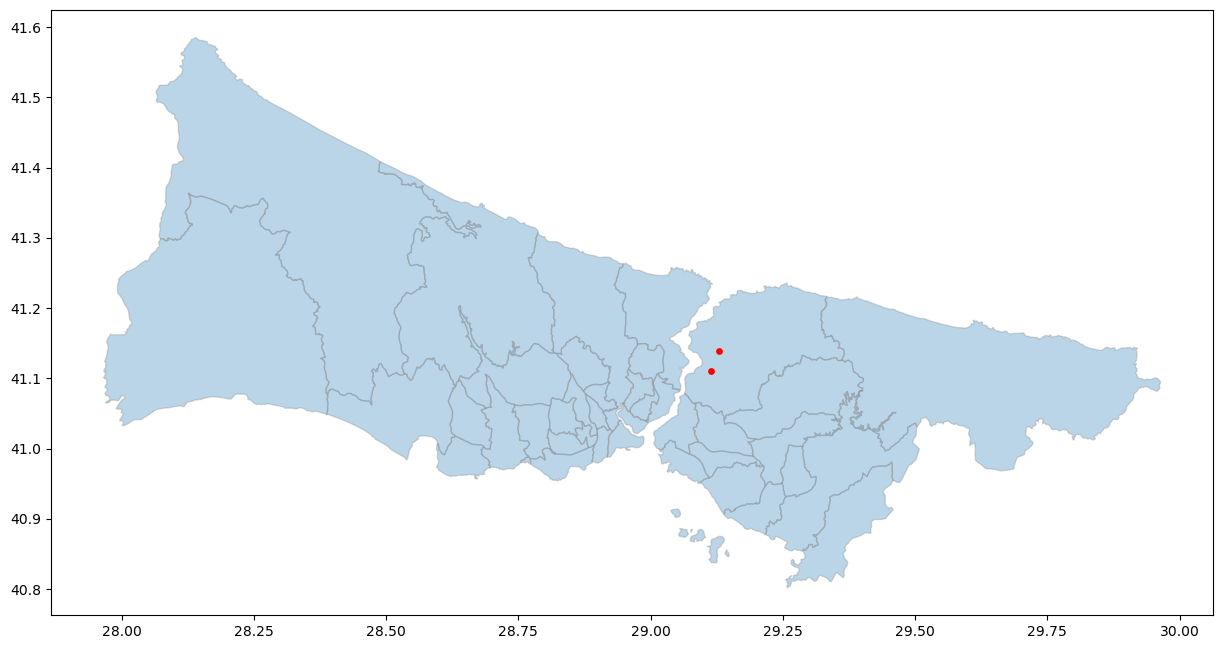

In [27]:
#İstanbul ilçelerinin sınırlarını içeren ist_ilce GeoDataFrame'i üzerinde, şeffaf ve gri sınır çizgileri olan bir harita çizerek başlar. Harita boyutları figsize parametresiyle belirlenir. Daha sonra, evler2 GeoDataFrame'indeki name sütununda 'beykoz' kelimesini içeren satırların, ax adlı bu haritaya kırmızı renkte daire şeklinde (marker='o') ve 15 büyüklüğünde (markersize= 15) noktalar olarak eklenmesiyle devam eder.Böylece, İstanbul ilçeleri haritası üzerinde, 'beykoz' kelimesi içeren konutların bulunduğu noktaların işaretlendiği kırmızı renkli bir nokta haritası oluşur.
ax = ist_ilce.plot(figsize=(15,15), alpha = 0.3, edgecolor ='gray')
evler2.loc[evler2['name'].str.contains('beykoz')].plot(ax=ax, color='red', marker='o', markersize= 15)

In [28]:
#evler2 GeoDataFrame'i ve ist_ilce GeoDataFrame'i birleştiriliyor. İki GeoDataFrame arasında within (içinde) mekansal birleştirme işlemi gerçekleştiriliyor (op='within'). Bu işlem sonucu, evler2 GeoDataFrame'inin her bir konutu, ist_ilce GeoDataFrame'indeki hangi ilçe sınırları içinde kaldığına göre, ilçe sınırları GeoDataFrame'ine ekleniyor.Birleştirme işlemi how='left' parametresiyle yapılıyor. Böylece, evler2 GeoDataFrame'inin tüm satırları korunurken, ist_ilce GeoDataFrame'inde eşleşme olmayan ilçeler için NaN değerleri atanıyor.Sonuçta, birlestirilmis adlı yeni bir GeoDataFrame oluşuyor. Bu GeoDataFrame, evler2 GeoDataFrame'i ile ist_ilce GeoDataFrame'i arasında yapılan mekansal birleştirme sonucu, her bir konutun hangi ilçe sınırları içinde kaldığı bilgisini içeriyor
birlestirilmis = gpd.sjoin(evler2, ist_ilce, op='within', how='left')

C:\Users\syorg\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3377: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\syorg\AppData\Local\Temp\ipykernel_19388\4100042118.py:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: +init=epsg:4329 +type=crs
Right CRS: EPSG:4326

  birlestirilmis = gpd.sjoin(evler2, ist_ilce, op='within', how='left')


In [29]:
#birlestirilmis GeoDataFrame'inin ilk 19 satırını görmek için birlestirilmis.head(19) komutu kullanılabilir. Bu komut, birlestirilmis GeoDataFrame'inin ilk 19 satırını görüntüler.
birlestirilmis.head(19)

,id,name,host_id,host_name,neighbourhood_group_left,neighbourhood_left,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,geometry,index_right,neighbourhood_right,neighbourhood_group_right
0,247874,"Istiklal Avenue,Sadri alisik street",1298849,Berkan,NaN,Beyoglu,41.033330,28.980300,Entire home/apt,588,...,2022-11-29,1.50,1,39,26,NaN,POINT (28.98030 41.03333),22,Beyoglu,NaN
1,618156,"Sultanahmet-Istanbul, Adalar Suite",2999837,Saban,NaN,Fatih,41.004170,28.966040,Entire home/apt,879,...,2022-11-06,0.72,13,354,17,NaN,POINT (28.96604 41.00417),21,Fatih,NaN
2,253055,CIHANGIR | Stunning Bosphorus View!,852380,Ilker,NaN,Beyoglu,41.033750,28.983240,Entire home/apt,3139,...,2022-11-20,0.64,5,319,15,NaN,POINT (28.98324 41.03375),22,Beyoglu,NaN
3,620129,Unique Concept in the Old City (Studio 1),3072862,Levent,NaN,Fatih,41.004560,28.979800,Private room,4315,...,2022-04-30,0.14,5,306,2,NaN,POINT (28.97980 41.00456),21,Fatih,NaN
4,27271,Lovely apartment in perfect location,117026,Mutlu,NaN,Beyoglu,41.032540,28.981530,Entire home/apt,999,...,2022-11-01,0.04,1,272,2,NaN,POINT (28.98153 41.03254),22,Beyoglu,NaN
5,28277,Duplex Apartment 11 with Terrace,121607,Alen Ziya,NaN,Sisli,41.046720,28.984020,Entire home/apt,1778,...,2022-11-26,0.40,19,340,7,NaN,POINT (28.98402 41.04672),25,Sisli,NaN
6,253859,A boutique experience in Istanbul,1333286,Erdal,NaN,Beyoglu,41.031210,28.980850,Private room,1798,...,NaN,NaN,1,365,0,NaN,POINT (28.98085 41.03121),22,Beyoglu,NaN
7,28318,Cosy home overlooking Bosphorus,121721,Aydin,NaN,Sariyer,41.091040,29.055800,Entire home/apt,2339,...,NaN,NaN,1,89,0,NaN,POINT (29.05580 41.09104),3,Sariyer,NaN
8,29241,"↪ Istanbul, Your second house",125742,Şevki,NaN,Beyoglu,41.048030,28.952270,Private room,936,...,NaN,NaN,1,365,0,NaN,POINT (28.95227 41.04803),22,Beyoglu,NaN
9,630494,Rooms with a Mystical Garden,3134482,Alper,NaN,Beyoglu,41.032030,28.988530,Shared room,999,...,NaN,NaN,1,365,0,NaN,POINT (28.98853 41.03203),22,Beyoglu,NaN


In [30]:
#birlestirilmis GeoDataFrame'inin neighbourhood_right sütunu baz alınarak gruplandırılması ve her grup için ortalama değerlerin hesaplanması sonucu oluşan yeni bir DataFrame hesap_ort ile tanımlanmıştır.
hesap_ort = birlestirilmis.groupby(['neighbourhood_right']).mean()

In [31]:
#hesap_ort DataFrame'i, birlestirilmis GeoDataFrame'inin neighbourhood_right sütunu baz alınarak gruplandırılması ve her grup için ortalama değerlerin hesaplanması sonucu oluşmuştur. Bu DataFrame, her bir semtteki ortalama ev fiyatı, yatak sayısı, banyo sayısı, mutfak sayısı ve oda sayısı gibi bilgileri içermektedir.
hesap_ort

,id,host_id,neighbourhood_group_left,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,index_right,neighbourhood_group_right
neighbourhood_right,,,,,,,,,,,,,,,
Adalar,3.058013e+17,2.455510e+08,NaN,40.874847,29.111097,1808.199422,17.832370,13.505780,1.073347,4.456647,243.144509,6.632948,NaN,37.0,NaN
Arnavutkoy,4.841616e+17,3.784187e+08,NaN,41.233364,28.702980,1600.914439,24.406417,8.262032,1.918485,3.090909,294.192513,6.732620,NaN,4.0,NaN
Atasehir,4.491625e+17,3.168992e+08,NaN,40.988441,29.111065,1626.421341,14.355677,4.857729,0.932005,6.714090,302.496580,3.079343,NaN,30.0,NaN
Avcilar,4.775271e+17,3.300264e+08,NaN,40.993773,28.718082,1014.170732,18.297561,2.170732,0.699128,15.424390,290.034146,1.380488,NaN,10.0,NaN
Bagcilar,4.449326e+17,3.414397e+08,NaN,41.048102,28.818498,1767.293777,5.730825,4.969609,0.882427,15.649783,301.965268,3.509407,NaN,15.0,NaN
Bahcelievler,4.565057e+17,3.197467e+08,NaN,40.999631,28.839335,1846.585952,12.144177,2.878004,0.813004,14.329020,309.439926,2.112754,NaN,11.0,NaN
Bakirkoy,4.393198e+17,2.860317e+08,NaN,40.981208,28.859026,1652.761006,39.607966,3.781971,0.931587,7.981132,288.532495,2.226415,NaN,12.0,NaN
Basaksehir,4.286424e+17,3.210768e+08,NaN,41.093675,28.762718,1820.863850,9.713615,1.835681,0.530526,7.967136,292.274648,1.183099,NaN,14.0,NaN
Bayrampasa,5.358257e+17,3.657174e+08,NaN,41.045790,28.901212,1369.164384,9.000000,2.164384,0.920000,2.657534,323.013699,1.808219,NaN,19.0,NaN


In [32]:
#birlestirilmis GeoDataFrame'i neighbourhood_right sütunu baz alınarak gruplandırılarak, her grup için ortalama değerlerin hesaplanması sonucu oluşan DataFrame hesap_ort ile tanımlanmıştı. birles_ort DataFrame'i ise, hesap_ort DataFrame'inin price sütunu baz alınarak, semtlerin ev fiyatlarına göre azalan şekilde sıralanmasıyla oluşmuştur. Yani birles_ort DataFrame'i, semtlerin ortalama ev fiyatlarına göre sıralanmış hallerini içermektedir.
birles_ort = birlestirilmis.groupby(['neighbourhood_right']).mean().sort_values('price',ascending=False)

In [33]:
#birles_ort DataFrame'i, semtlerin ortalama ev fiyatlarına göre azalan şekilde sıralanmış hallerini içermektedir.
birles_ort

,id,host_id,neighbourhood_group_left,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,index_right,neighbourhood_group_right
neighbourhood_right,,,,,,,,,,,,,,,
Beylikduzu,4.899585e+17,3.373364e+08,NaN,40.991443,28.642432,13052.955631,12.102389,1.952218,0.681811,3.211604,291.331058,1.563140,NaN,9.0,NaN
Tuzla,4.184087e+17,3.114975e+08,NaN,40.846834,29.314338,5518.708333,14.486111,3.444444,1.003750,3.083333,299.791667,2.187500,NaN,35.0,NaN
Buyukcekmece,4.833418e+17,3.341832e+08,NaN,41.022885,28.548989,4495.485106,32.995745,1.455319,0.675977,2.600000,315.510638,1.097872,NaN,7.0,NaN
Beykoz,3.269259e+17,2.676777e+08,NaN,41.115774,29.133514,3685.178218,47.277228,4.727723,0.762277,6.821782,286.831683,2.925743,NaN,27.0,NaN
Sariyer,4.146221e+17,2.595192e+08,NaN,41.141494,29.042236,3241.497768,8.171875,4.879464,0.870176,8.761161,288.629464,3.078125,NaN,3.0,NaN
Besiktas,3.833373e+17,2.429852e+08,NaN,41.054901,29.013535,3190.961157,11.100561,7.618472,1.026749,9.630988,273.116530,4.287441,NaN,23.0,NaN
Silivri,5.112573e+17,3.321795e+08,NaN,41.082179,28.219667,3140.783505,4.886598,1.804124,0.636176,2.371134,294.835052,0.917526,NaN,5.0,NaN
Beyoglu,3.120550e+17,2.308190e+08,NaN,41.033096,28.979056,2969.776557,19.122646,22.322791,1.434526,14.203283,279.250241,9.565427,NaN,22.0,NaN
Kadikoy,4.251319e+17,2.623209e+08,NaN,40.987405,29.041702,2851.108274,10.712206,7.569969,1.163044,6.363636,271.383299,4.647344,NaN,29.0,NaN


In [34]:
#birlestirilmis veri çerçevesine, her bir satırın toplam sayısını hesaplayan toplam adında yeni bir sütun eklenmiştir.
birlestirilmis['toplam']  =1

In [35]:
#birlestirilmis veri çerçevesi, "evler2" ve "ist_ilce" veri çerçevelerinin birleştirilmesi sonucu oluşan, evlerin hangi semtte olduğu bilgisini içeren bir veri çerçevesidir. Her bir satır bir evi temsil etmektedir ve evlerin özellikleri (fiyat, yatak odası sayısı vb.) ile hangi semtte olduğu bilgileri verilmiştir. Bunun yanı sıra toplam adında bir sütun da eklenmiştir ve bu sütunda her bir satırın toplam sayısı (yani ev sayısı) bulunmaktadır.
birlestirilmis

,id,name,host_id,host_name,neighbourhood_group_left,neighbourhood_left,latitude,longitude,room_type,price,...,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,geometry,index_right,neighbourhood_right,neighbourhood_group_right,toplam
0,247874,"Istiklal Avenue,Sadri alisik street",1298849,Berkan,NaN,Beyoglu,41.033330,28.980300,Entire home/apt,588,...,1.50,1,39,26,NaN,POINT (28.98030 41.03333),22,Beyoglu,NaN,1
1,618156,"Sultanahmet-Istanbul, Adalar Suite",2999837,Saban,NaN,Fatih,41.004170,28.966040,Entire home/apt,879,...,0.72,13,354,17,NaN,POINT (28.96604 41.00417),21,Fatih,NaN,1
2,253055,CIHANGIR | Stunning Bosphorus View!,852380,Ilker,NaN,Beyoglu,41.033750,28.983240,Entire home/apt,3139,...,0.64,5,319,15,NaN,POINT (28.98324 41.03375),22,Beyoglu,NaN,1
3,620129,Unique Concept in the Old City (Studio 1),3072862,Levent,NaN,Fatih,41.004560,28.979800,Private room,4315,...,0.14,5,306,2,NaN,POINT (28.97980 41.00456),21,Fatih,NaN,1
4,27271,Lovely apartment in perfect location,117026,Mutlu,NaN,Beyoglu,41.032540,28.981530,Entire home/apt,999,...,0.04,1,272,2,NaN,POINT (28.98153 41.03254),22,Beyoglu,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36712,792457367750268976,Pleasant Flat in the Heart of Balat,227780486,Engin,NaN,Fatih,41.031461,28.947704,Entire home/apt,589,...,NaN,48,363,0,NaN,POINT (28.94770 41.03146),21,Fatih,NaN,1
36713,792458241608284854,gecelik günlük aylık daire,488504277,Mesut,NaN,Bahcelievler,40.995210,28.848080,Private room,800,...,NaN,1,365,0,NaN,POINT (28.84808 40.99521),11,Bahcelievler,NaN,1
36714,792462372352157985,Bright & Cozy & Central,493287294,Selen,NaN,Beyoglu,41.036333,28.977271,Entire home/apt,1500,...,NaN,1,354,0,NaN,POINT (28.97727 41.03633),22,Beyoglu,NaN,1
36715,792462506567602985,Wonder Karaköy- 2 units 8 BR/AC,19798022,Wonder,NaN,Beyoglu,41.025024,28.971393,Entire home/apt,9989,...,NaN,94,365,0,NaN,POINT (28.97139 41.02502),22,Beyoglu,NaN,1


In [36]:
#birlestirilmis veri çerçevesi üzerinde neighbourhood_right sütununa göre gruplama yapılıyor. Ardından her bir grup için toplam sütununun sayısı hesaplanarak toplamlar değişkenine atanıyor. Böylece her mahallede kaç adet ev olduğu hesaplanmış oluyor.
toplamlar = birlestirilmis.groupby(['neighbourhood_right']).count()['toplam']

In [37]:
#toplamlar, her bir semt için toplam kayıt sayısını içeren bir Pandas Serisi'dir.
toplamlar

neighbourhood_right
Adalar            346
Arnavutkoy        187
Atasehir          731
Avcilar           410
Bagcilar          691
Bahcelievler      541
Bakirkoy          477
Basaksehir        426
Bayrampasa         73
Besiktas         2317
Beykoz            202
Beylikduzu        293
Beyoglu          8284
Buyukcekmece      235
Catalca            42
Cekmekoy          110
Esenler            64
Esenyurt         1450
Eyup              374
Fatih            3786
Gaziosmanpasa     117
Gungoren           94
Kadikoy          3916
Kagithane        1027
Kartal            390
Kucukcekmece      392
Maltepe           665
Pendik            399
Sancaktepe         74
Sariyer           448
Sile              438
Silivri            97
Sisli            5478
Sultanbeyli        31
Sultangazi         49
Tuzla             144
Umraniye          461
Uskudar          1205
Zeytinburnu       231
Name: toplam, dtype: int64

Text(0.5, 1.0, 'İlçelerdeki Airbnb Daire Sayıları')

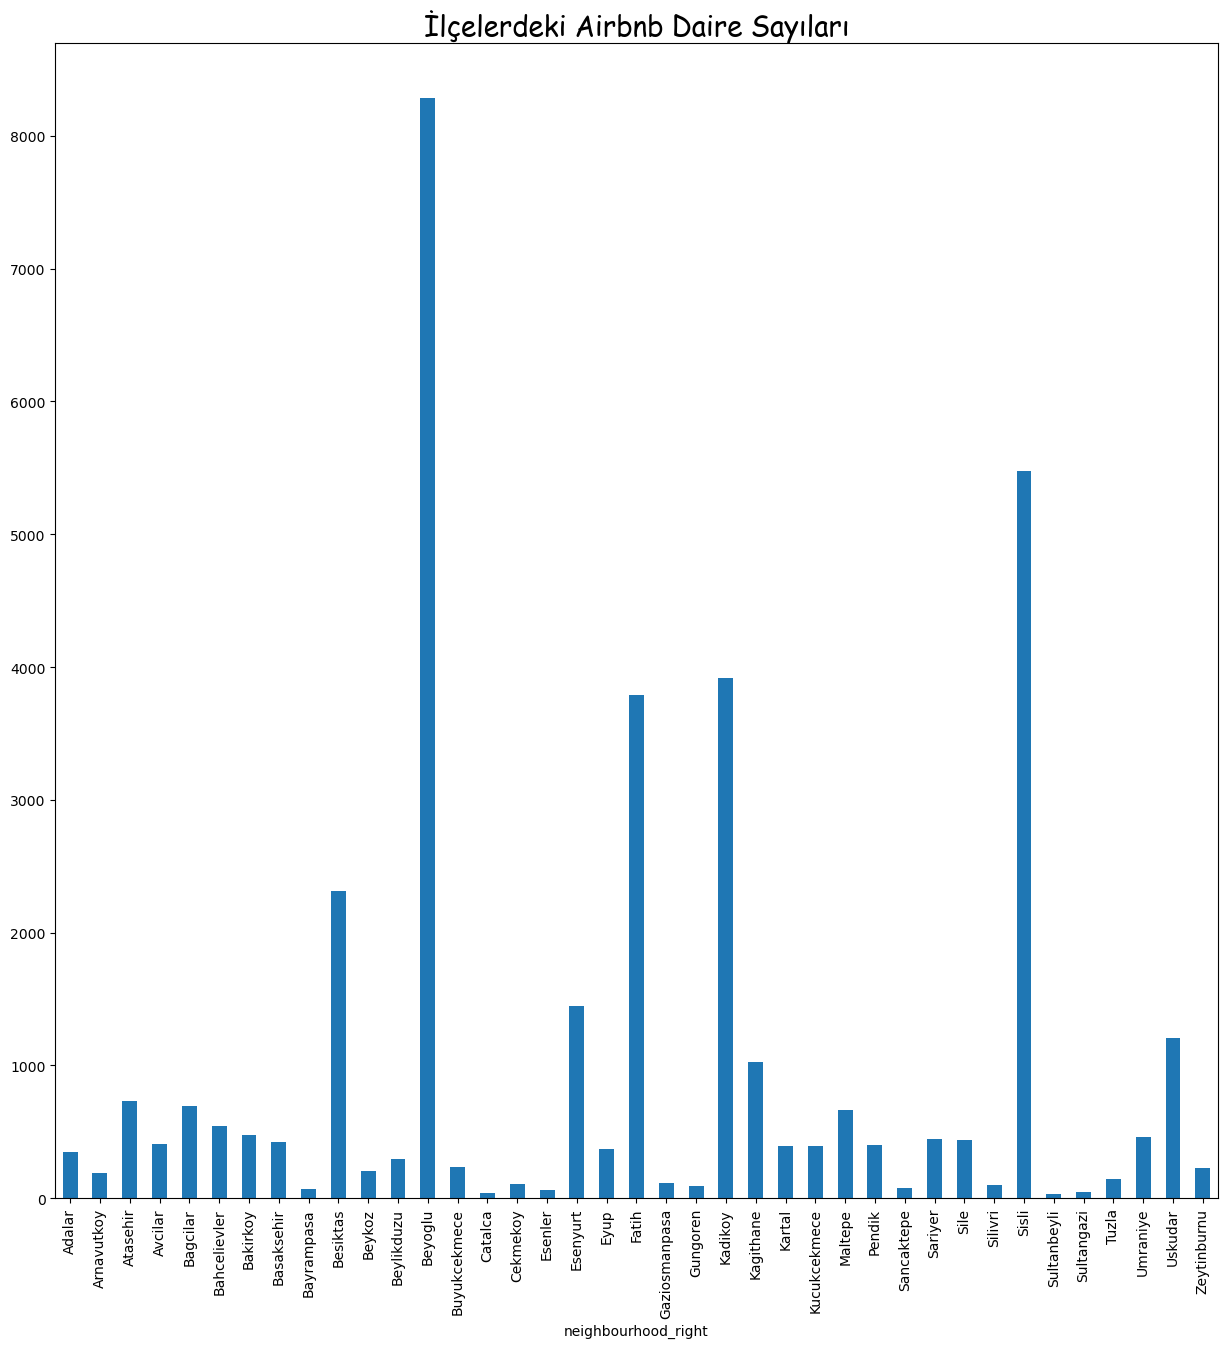

In [38]:
#Bu grafik İstanbul'un farklı semtlerindeki Airbnb dairelerinin sayısını göstermektedir. Her bir bar grafiği bir semti temsil eder ve yüksekliği o semtteki Airbnb dairelerinin sayısını gösterir. En yüksek bar grafiği Beyoğlu'nda olduğu gibi gözükmekte, en düşük bar grafiği ise Şile'de yer almaktadır.
toplamlar.plot(kind='bar', figsize=(15,15))
plt.title('İlçelerdeki Airbnb Daire Sayıları', fontdict={'fontname': 'Comic Sans MS', 'fontsize':20})

In [39]:
#toplamlar değişkeni, her bir ilçede kaç tane Airbnb ilanı olduğunu içeren bir Pandas Serisi'dir. type(toplamlar) ifadesi ise bu değişkenin veri tipini, yani bir Pandas Serisi olduğunu belirtir.
type(toplamlar)

pandas.core.series.Series

In [40]:
#toplamlar.to_frame() bir pandas Serisi olan toplamlar'ı DataFrame'e dönüştürüyor. toplamlar2 adlı bu yeni DataFrame, neighbourhood_right özelliği (sütunu) olarak İstanbul ilçelerini içeriyor ve her ilçede Airbnb daire sayısını içeren bir toplam sütunu var.
toplamlar2 = toplamlar.to_frame()

In [41]:
#toplamlar2 is a pandas DataFrame that contains the count of Airbnb apartments in each district of Istanbul. The index of the DataFrame is the district names and the only column is the count of apartments.
toplamlar2

,toplam
neighbourhood_right,
Adalar,346
Arnavutkoy,187
Atasehir,731
Avcilar,410
Bagcilar,691
Bahcelievler,541
Bakirkoy,477
Basaksehir,426
Bayrampasa,73


In [42]:
#ist_ilce veri seti, İstanbul ilinde bulunan ilçelerin sınırlarını belirleyen GeoJSON dosyasını içerir. birlestirilmis veri seti ise Airbnb dairelerinin longitude ve latitude değerlerine sahip olduğu konum bilgilerini içerir. Bu veri setindeki konum bilgileri, shapely kütüphanesi kullanılarak geometrik noktalara dönüştürülür ve GeoDataFrame olarak yeniden tanımlanır. Sonra bu iki veri seti within işlemi kullanılarak ilçelerin sınırları içindeki daireler belirlenir ve bu dairelerin fiyatlarına göre ilçelerin ortalama fiyatları hesaplanır. Bu hesaplamalara göre elde edilen sonuçlar bir DataFrame olarak toplanarak ilçelerin Airbnb daire sayıları ile birleştirilir ve her ilçe için toplam Airbnb daire sayısı bir grafik üzerinde gösterilir.
ist_ilce

,neighbourhood,neighbourhood_group,geometry
0,Sile,NaN,"MULTIPOLYGON (((29.40004 41.08274, 29.40101 41..."
1,Catalca,NaN,"MULTIPOLYGON (((28.53614 41.10624, 28.53185 41..."
2,Eyup,NaN,"MULTIPOLYGON (((28.94881 41.26322, 28.94760 41..."
3,Sariyer,NaN,"MULTIPOLYGON (((29.05429 41.08144, 29.05436 41..."
4,Arnavutkoy,NaN,"MULTIPOLYGON (((28.81849 41.13628, 28.80986 41..."
5,Silivri,NaN,"MULTIPOLYGON (((28.38724 41.04804, 28.38520 41..."
6,Kagithane,NaN,"MULTIPOLYGON (((29.00345 41.09491, 29.00361 41..."
7,Buyukcekmece,NaN,"MULTIPOLYGON (((28.55267 41.10449, 28.55318 41..."
8,Esenyurt,NaN,"MULTIPOLYGON (((28.63047 41.01797, 28.62855 41..."
9,Beylikduzu,NaN,"MULTIPOLYGON (((28.68545 41.00178, 28.68214 41..."


In [43]:
#ist_ilce_birles, ilçe verilerinin ve bir önceki aşamada hesaplanan ortalama fiyat bilgilerinin birleştirildiği bir GeoDataFrame nesnesidir. merge() fonksiyonu, ist_ilce ve birles_ort veri setlerindeki ilçe isimlerine göre birleştirme işlemi gerçekleştirir. Bu işlem sonrasında, her bir ilçe için ortalama fiyat bilgisi ve ilçenin geometrisi (geometry sütunu) ist_ilce_birles nesnesinde bir arada yer alır.
ist_ilce_birles = ist_ilce.merge(birles_ort, left_on='neighbourhood', right_on='neighbourhood_right')

In [44]:
#ist_ilce_birles adında bir değişken oluşturduk. Bu değişken, ist_ilce adındaki geopandas veri çerçevesi ile birles_ort adındaki pandas veri çerçevesini birleştirerek oluşturuldu. Birleştirme işlemi, neighbourhood sütunu ile neighbourhood_right sütununu birleştirerek yapıldı. left_on ve right_on argümanları bu sütun isimlerini belirtmek için kullanıldı. Bu birleştirme işlemi sonucunda, ist_ilce_birles veri çerçevesi, ist_ilce veri çerçevesine ek olarak birles_ort veri çerçevesindeki ortalama fiyat sütununu içermektedir.
ist_ilce_birles.head()


,neighbourhood,neighbourhood_group,geometry,id,host_id,neighbourhood_group_left,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,index_right,neighbourhood_group_right
0,Sile,NaN,"MULTIPOLYGON (((29.40004 41.08274, 29.40101 41...",4.119342e+17,3.176731e+08,NaN,41.146427,29.708109,2244.607306,70.515982,5.027397,0.770143,6.381279,283.979452,2.710046,NaN,0.0,NaN
1,Catalca,NaN,"MULTIPOLYGON (((28.53614 41.10624, 28.53185 41...",3.786081e+17,3.040476e+08,NaN,41.270984,28.416082,2701.404762,2.666667,6.571429,1.171739,5.880952,330.642857,4.833333,NaN,1.0,NaN
2,Eyup,NaN,"MULTIPOLYGON (((28.94881 41.26322, 28.94760 41...",4.414142e+17,3.013834e+08,NaN,41.097747,28.926638,2140.812834,31.029412,4.042781,0.891768,3.949198,291.181818,2.144385,NaN,2.0,NaN
3,Sariyer,NaN,"MULTIPOLYGON (((29.05429 41.08144, 29.05436 41...",4.146221e+17,2.595192e+08,NaN,41.141494,29.042236,3241.497768,8.171875,4.879464,0.870176,8.761161,288.629464,3.078125,NaN,3.0,NaN
4,Arnavutkoy,NaN,"MULTIPOLYGON (((28.81849 41.13628, 28.80986 41...",4.841616e+17,3.784187e+08,NaN,41.233364,28.702980,1600.914439,24.406417,8.262032,1.918485,3.090909,294.192513,6.732620,NaN,4.0,NaN


In [45]:
#to_file() metodu, bir GeoDataFrame'i belirtilen dosya biçimine dönüştürür ve belirtilen dosyaya kaydeder. Bu durumda, ist_ilce_birles GeoDataFrame'ini GeoJSON dosya biçimine dönüştürerek ist_ilce_birles.geojson dosyasına kaydediyoruz. Bu dosya daha sonra haritalama araçları kullanılarak harita olarak görüntülenebilir veya işlenebilir.
ist_ilce_birles.to_file("ist_ilce_birles.geojson", driver='GeoJSON')

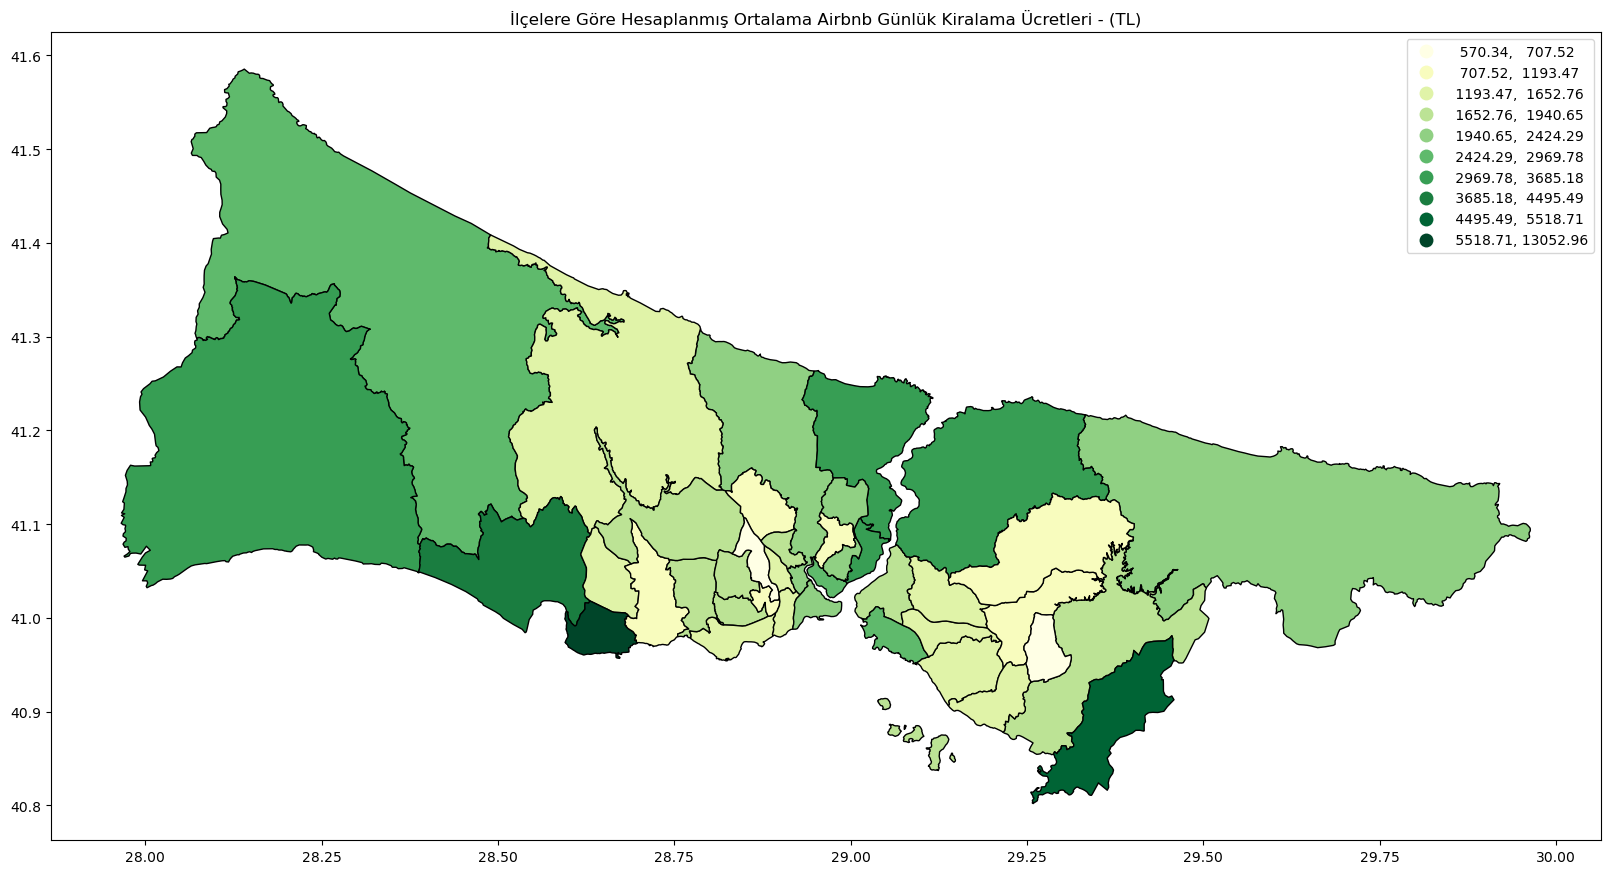

In [46]:
#ist_ilce_birles veri kümesini bir harita olarak görselleştirir. plot() fonksiyonu, verilen figsize parametresiyle boyutlandırılmış bir matplotlib grafiği döndürür. Harita renkli bir harita olarak çizilir ve sınıflandırma yöntemi olarak Fisher-Jenks kullanılarak, verilen k sayısı kadar sınıflandırılır. Haritada, sınıf sınırlandırmalarını gösteren bir efsane bulunur. Görsel, istanbul-airbnb-listelenmis-ilce-bazli-map.png dosyasına yüksek çözünürlüklü olarak kaydedilir.
ax = ist_ilce_birles.plot(figsize=(20,20), column='price', scheme='fisher_jenks', k=10, legend=True, cmap='YlGn', edgecolor='black')
ax.set_title("İlçelere Göre Hesaplanmış Ortalama Airbnb Günlük Kiralama Ücretleri - (TL)")
plt.savefig('istanbul-airbnb-listelenmis-ilce-bazli-map.png', dpi=300)

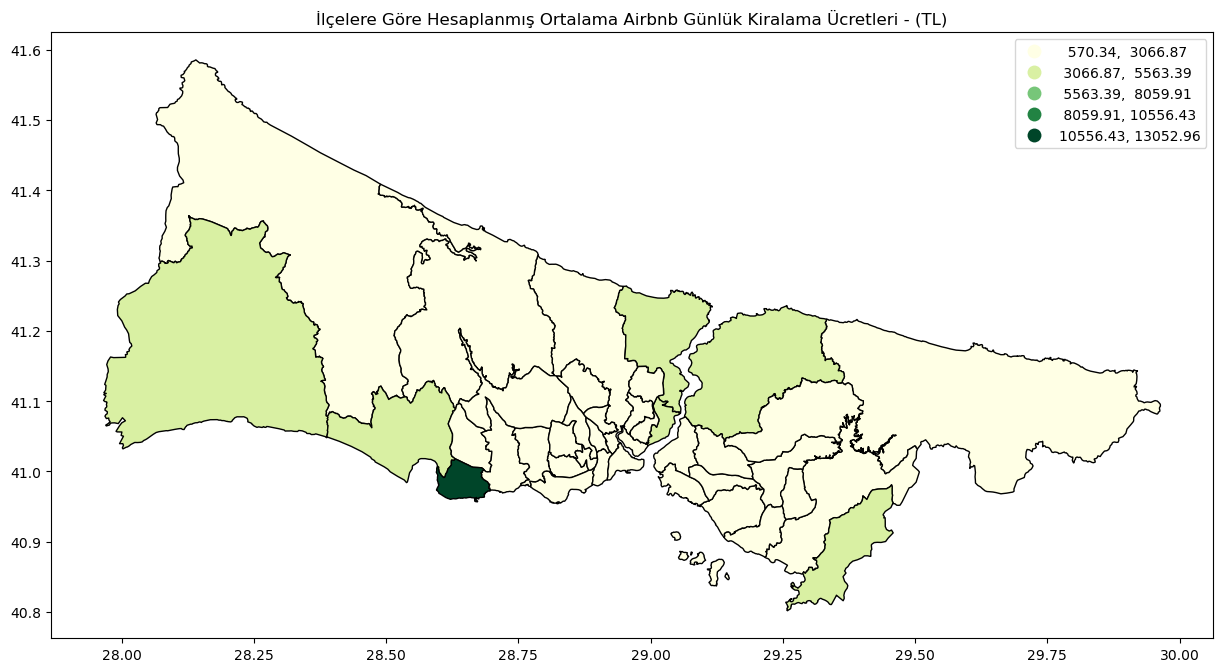

In [47]:
#ist_ilce_birles veri kümesindeki her bir ilçenin ortalamasına göre renklendirilmiş bir harita oluşturur. column parametresi, hangi sütuna göre renklendirileceğini belirler. scheme parametresi, renklendirme şemasını belirler ve k parametresi, kaç renk kullanılacağını belirler. legend parametresi, renklerin açıklamalarını gösterir. cmap parametresi, renk paletini belirler ve edgecolor parametresi, ilçe sınırlarının rengini belirler. set_title fonksiyonu, haritanın başlığını ayarlar. plt.savefig fonksiyonu, haritayı kaydeder ve dpi parametresi, kaydedilen görüntünün çözünürlüğünü belirler.
ax = ist_ilce_birles.plot(figsize=(15,15), column='price', scheme='equal_interval', k=5, legend=True, cmap='YlGn', edgecolor='black')
ax.set_title("İlçelere Göre Hesaplanmış Ortalama Airbnb Günlük Kiralama Ücretleri - (TL)")
plt.savefig('istanbul-airbnb-listelenmis-ilce-bazli-map.png', dpi=300)

<AxesSubplot:>

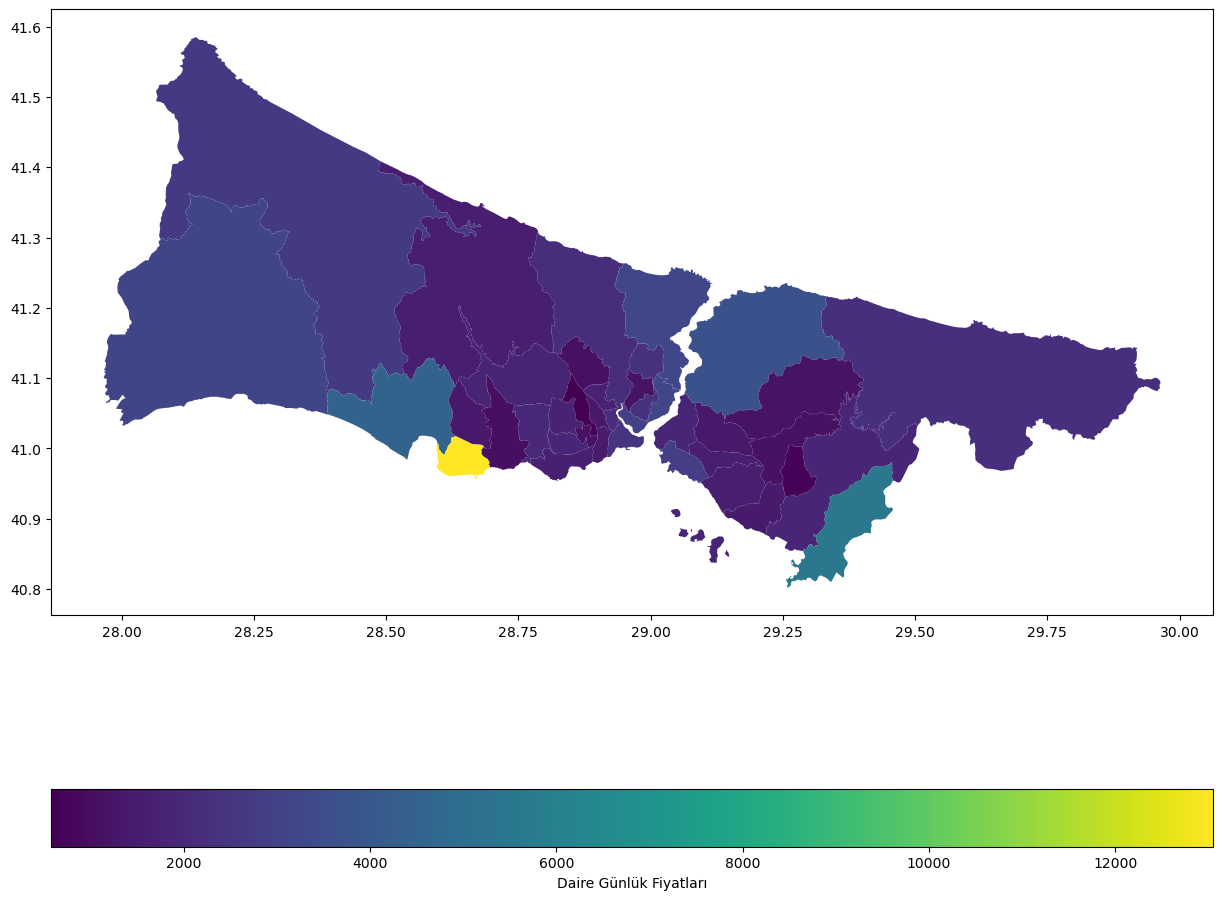

In [48]:
#ist_ilce_birles veri çerçevesindeki price sütununu kullanarak, her bir ilçenin ortalama Airbnb günlük kiralama fiyatını temsil eden bir harita oluşturur. Harita, geopandas kütüphanesinin plot() fonksiyonu kullanılarak çizilir. column parametresi, haritada renk skalasında gösterilecek sütunu belirtir. scheme parametresi, renk skalası ayarlarına erişim sağlar ve equal_interval ölçeği, sınırları eşit büyüklükte 5 kategoriye ayırır. legend parametresi, bir açıklama tablosu ekler. legend_kwds parametresi, açıklama tablosunun parametrelerini belirtir. Son olarak, plt.savefig() fonksiyonu, haritanın kaydedilmesini sağlar.
fig, ax = plt.subplots(1, 1, figsize=(15,15))
ist_ilce_birles.plot(column='price', ax=ax, legend=True, legend_kwds={'label': "Daire Günlük Fiyatları",'orientation': "horizontal"})

In [49]:
#Burada, sadece ortalama günlük fiyatı 1000 Türk Lirasının altında olan ilçeleri içeren bir altküme oluşturuyoruz.
ist_secilmis = ist_ilce_birles[(ist_ilce_birles['price']< 1000)]

In [50]:
#ist_secilmis değişkeni, 1000 TL'den daha düşük günlük fiyatları olan Airbnb dairelerinin bulunduğu ilçelerin ist_ilce_birles veri kümesinden seçilmiş halidir. head() fonksiyonu ile ilk beş gözlemin görüntülenmesi sağlanmıştır.
ist_secilmis.head()

,neighbourhood,neighbourhood_group,geometry,id,host_id,neighbourhood_group_left,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,index_right,neighbourhood_group_right
18,Esenler,NaN,"MULTIPOLYGON (((28.89912 41.02157, 28.89775 41...",2.961704e+17,2.366411e+08,NaN,41.037504,28.882185,570.343750,2.265625,1.421875,0.590000,16.656250,166.171875,0.859375,NaN,18.0,NaN
33,Sultanbeyli,NaN,"MULTIPOLYGON (((29.28755 41.00274, 29.28668 40...",4.859362e+17,3.258462e+08,NaN,40.960315,29.275069,707.516129,14.580645,1.483871,0.989091,1.741935,290.322581,1.354839,NaN,33.0,NaN


<AxesSubplot:>

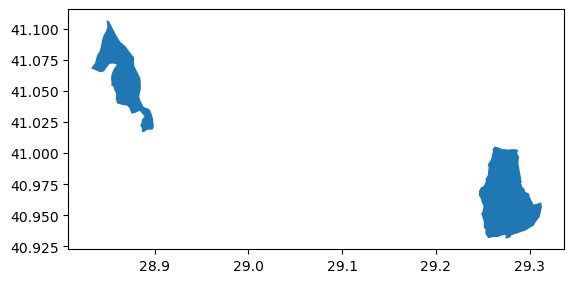

In [51]:
#ist_secilmis veri kümesindeki verileri görselleştirmek için bir çizim oluşturuyor.
ist_secilmis.plot()